<a href="https://colab.research.google.com/github/Nico2423/Proyectos/blob/main/colab_retail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google import colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

In [4]:
online_retail = pd.read_csv('/content/drive/MyDrive/DATASETS/online_retail.csv')

Vamos a analizar un poco de qué trata nuestro dataset, según lo visto trata de un inventario de elementos decorativos, en este dataset podemos encontrar código, descripción, cantidad, la respectiva fecha con su hora, precio unitario, el ID y además el país al cual hace referencia, todo esto con cada producto

Primero vamos a investigar qué países hay en nuestro dataset y elegiremos a uno para hacer nuestro estudio y responder algunas preguntas planteadas

Las preguntas son:
* ¿Cuáles son los días con mayor ganancia respecto a productos registrados?
* ¿Cuáles son los días con mayores pérdidas respecto a productos registrados?
* ¿Cuál es el producto que cuenta con mayor stock?
* ¿Cuál es el producto que genera más ganancias?





In [5]:
paises = online_retail['Country'].unique()
paises

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

Acá nos damos cuenta que el estudio analiza un total de 38 países

In [6]:
len(paises)

38

Vamos a analizar Italia

In [7]:
online_retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


Vamos a realizar un análisis y una limpieza de los respectivos datos

In [8]:
online_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [9]:
online_retail['InvoiceDate'] = pd.to_datetime(online_retail['InvoiceDate'])

In [10]:
online_retail['InvoiceDate'] = online_retail['InvoiceDate'].dt.strftime('%Y-%m-%d')

In [11]:
online_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [12]:
online_retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680.0,France


Primero vamos a seleccionar los datos correspondientes al país que seleccionamos

In [13]:
retail_italia = online_retail[online_retail['Country'] == 'Italy']
retail_italia

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
7214,537022,22791,T-LIGHT GLASS FLUTED ANTIQUE,12,2010-12-03,1.25,12725.0,Italy
7215,537022,21287,SCENTED VELVET LOUNGE CANDLE,12,2010-12-03,1.25,12725.0,Italy
7216,537022,79337,BLUE FLOCK GLASS CANDLEHOLDER,6,2010-12-03,1.65,12725.0,Italy
7217,537022,85111,SILVER GLITTER FLOWER VOTIVE HOLDER,12,2010-12-03,1.25,12725.0,Italy
7218,537022,85038,6 CHOCOLATE LOVE HEART T-LIGHTS,6,2010-12-03,2.10,12725.0,Italy
...,...,...,...,...,...,...,...,...
529689,580746,22846,BREAD BIN DINER STYLE RED,1,2011-12-06,16.95,12584.0,Italy
529690,580746,22667,RECIPE BOX RETROSPOT,6,2011-12-06,2.95,12584.0,Italy
529691,580746,48138,DOORMAT UNION FLAG,2,2011-12-06,8.25,12584.0,Italy
529692,580746,22627,MINT KITCHEN SCALES,2,2011-12-06,8.50,12584.0,Italy


In [14]:
retail_italia = retail_italia.drop(columns= ['Description', 'StockCode','Country'])
retail_italia

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
7214,537022,12,2010-12-03,1.25,12725.0
7215,537022,12,2010-12-03,1.25,12725.0
7216,537022,6,2010-12-03,1.65,12725.0
7217,537022,12,2010-12-03,1.25,12725.0
7218,537022,6,2010-12-03,2.10,12725.0
...,...,...,...,...,...
529689,580746,1,2011-12-06,16.95,12584.0
529690,580746,6,2011-12-06,2.95,12584.0
529691,580746,2,2011-12-06,8.25,12584.0
529692,580746,2,2011-12-06,8.50,12584.0


Con esto averiguamos la cantidad de datos faltantes y los cuales no cuentan con el formato correcto, en este caso podemos ver que del país elegido no contamos con ningún dato faltante

In [15]:
retail_italia.info()

<class 'pandas.core.frame.DataFrame'>
Index: 803 entries, 7214 to 529693
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    803 non-null    object 
 1   Quantity     803 non-null    int64  
 2   InvoiceDate  803 non-null    object 
 3   UnitPrice    803 non-null    float64
 4   CustomerID   803 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 69.9+ KB


In [16]:
retail_italia.isnull().sum()

,0
InvoiceNo,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0


Y con esto podemos verificar que tampoco hay elementos duplicados

In [17]:
retail_italia.duplicated().sum()

292

Vamos a organizar los valores en cuanto a cantidad se refiere, esto de mayor a menor

In [18]:
retail_italia = retail_italia.sort_values(by='Quantity', ascending=False)
retail_italia

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
404195,571670,200,2011-10-18,0.72,12611.0
492344,578108,144,2011-11-23,0.39,14912.0
492341,578108,100,2011-11-23,0.72,14912.0
163480,550606,96,2011-04-19,0.39,12594.0
492343,578108,96,2011-11-23,0.39,14912.0
...,...,...,...,...,...
464997,C576199,-6,2011-11-14,4.25,12610.0
516073,C579864,-9,2011-11-30,9.95,12584.0
72926,C542273,-9,2011-01-27,1.25,12578.0
72927,C542273,-9,2011-01-27,1.25,12578.0


Esta es la cantidad de elementos que se encuentran en nuestro inventario

In [19]:
retail_italia['Quantity'].sum()

7999

Y ahora vamos a ver el dinero total que se posee acorde al inventario

In [20]:
retail_italia['Total'] = retail_italia['Quantity'] * retail_italia['UnitPrice']
retail_italia

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Total
404195,571670,200,2011-10-18,0.72,12611.0,144.00
492344,578108,144,2011-11-23,0.39,14912.0,56.16
492341,578108,100,2011-11-23,0.72,14912.0,72.00
163480,550606,96,2011-04-19,0.39,12594.0,37.44
492343,578108,96,2011-11-23,0.39,14912.0,37.44
...,...,...,...,...,...,...
464997,C576199,-6,2011-11-14,4.25,12610.0,-25.50
516073,C579864,-9,2011-11-30,9.95,12584.0,-89.55
72926,C542273,-9,2011-01-27,1.25,12578.0,-11.25
72927,C542273,-9,2011-01-27,1.25,12578.0,-11.25


In [21]:
retail_italia.info()

<class 'pandas.core.frame.DataFrame'>
Index: 803 entries, 404195 to 298044
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    803 non-null    object 
 1   Quantity     803 non-null    int64  
 2   InvoiceDate  803 non-null    object 
 3   UnitPrice    803 non-null    float64
 4   CustomerID   803 non-null    float64
 5   Total        803 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 76.2+ KB


In [22]:
retail_italia['Total'].sum()

16890.510000000002

In [23]:
retail_italia.tail()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Total
464997,C576199,-6,2011-11-14,4.25,12610.0,-25.50
516073,C579864,-9,2011-11-30,9.95,12584.0,-89.55
72926,C542273,-9,2011-01-27,1.25,12578.0,-11.25
72927,C542273,-9,2011-01-27,1.25,12578.0,-11.25
298044,C562969,-12,2011-08-11,0.65,12610.0,-7.80


Vamos a hacer una columna asignada a las ganancias totales respecto a cada producto

In [24]:
saldo_negativo = retail_italia[(retail_italia['Total']<0) & (retail_italia['Quantity']<0)]
saldo_negativo

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Total
72929,C542273,-1,2011-01-27,2.55,12578.0,-2.55
465289,C576216,-1,2011-11-14,10.95,12584.0,-10.95
291073,C562423,-1,2011-08-04,12.75,12584.0,-12.75
464995,C576199,-1,2011-11-14,1.95,12610.0,-1.95
493613,C578239,-1,2011-11-23,26.33,14912.0,-26.33
515712,C579785,-1,2011-11-30,2.95,12584.0,-2.95
464996,C576199,-1,2011-11-14,2.55,12610.0,-2.55
88000,C543743,-1,2011-02-11,4.50,12505.0,-4.50
72928,C542273,-1,2011-01-27,2.55,12578.0,-2.55
419248,C572761,-1,2011-10-26,8.50,12584.0,-8.50


In [25]:
saldo_negativo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45 entries, 72929 to 298044
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    45 non-null     object 
 1   Quantity     45 non-null     int64  
 2   InvoiceDate  45 non-null     object 
 3   UnitPrice    45 non-null     float64
 4   CustomerID   45 non-null     float64
 5   Total        45 non-null     float64
dtypes: float64(3), int64(1), object(2)
memory usage: 3.5+ KB


Con esto nos damos cuenta que contamos con 113 elementos perdidos o que aparecen en números negativos en nuestro inventario

In [26]:
saldo_negativo['Quantity'].sum()

-113

Y por ende el valor correspondiente a estas pérdidas es de 592.73, al ser de Italia asumiremos que hace referencia a euros

In [27]:
saldo_negativo['Total'].sum()

-592.7299999999999

In [28]:
fechas_saldo_negativo = saldo_negativo.groupby('InvoiceDate').sum()
fechas_saldo_negativo = fechas_saldo_negativo.sort_values(by='Total', ascending= True)
fechas_saldo_negativo = fechas_saldo_negativo.drop(columns=['InvoiceNo'], axis = 1)
fechas_saldo_negativo

,Quantity,UnitPrice,CustomerID,Total
InvoiceDate,,,,
2011-11-30,-21,49.65,75504.0,-197.80
2011-11-14,-22,51.75,113334.0,-103.20
2011-10-06,-9,31.95,75504.0,-48.35
2011-08-04,-6,31.15,50336.0,-44.60
2011-06-29,-4,36.85,37752.0,-39.80
2011-01-27,-22,10.55,62890.0,-33.50
2011-10-26,-6,22.05,50336.0,-30.55
2011-11-23,-1,26.33,14912.0,-26.33
2011-03-28,-1,18.00,12594.0,-18.00


In [29]:
fechas_saldo_negativo[['Quantity', 'Total']]
fechas_saldo_negativo

,Quantity,UnitPrice,CustomerID,Total
InvoiceDate,,,,
2011-11-30,-21,49.65,75504.0,-197.80
2011-11-14,-22,51.75,113334.0,-103.20
2011-10-06,-9,31.95,75504.0,-48.35
2011-08-04,-6,31.15,50336.0,-44.60
2011-06-29,-4,36.85,37752.0,-39.80
2011-01-27,-22,10.55,62890.0,-33.50
2011-10-26,-6,22.05,50336.0,-30.55
2011-11-23,-1,26.33,14912.0,-26.33
2011-03-28,-1,18.00,12594.0,-18.00


In [30]:
fechas_saldo_negativo = fechas_saldo_negativo.sort_values(by='InvoiceDate', ascending= True)

In [31]:
fechas_saldo_negativo

,Quantity,UnitPrice,CustomerID,Total
InvoiceDate,,,,
2010-12-06,-2,8.50,12586.0,-17.00
2011-01-05,-3,2.55,12578.0,-7.65
2011-01-27,-22,10.55,62890.0,-33.50
2011-02-11,-1,4.50,12505.0,-4.50
2011-03-14,-2,4.95,12584.0,-9.90
2011-03-28,-1,18.00,12594.0,-18.00
2011-06-29,-4,36.85,37752.0,-39.80
2011-08-04,-6,31.15,50336.0,-44.60
2011-08-11,-13,4.40,25220.0,-11.55


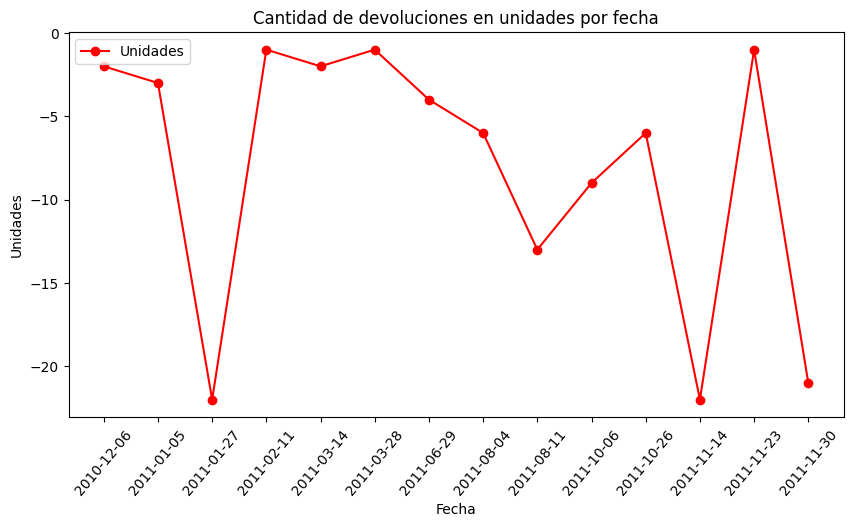

In [32]:
plt.figure(figsize=(10,5))
plt.plot(fechas_saldo_negativo['Quantity'],marker ='o', label='Unidades', color = 'red')
plt.legend()
plt.title('Cantidad de devoluciones en unidades por fecha')
plt.xlabel('Fecha')
plt.ylabel('Unidades')
plt.xticks(fechas_saldo_negativo.index, rotation= 50)
plt.xlabel('Fecha')
plt.show()

Ahora sólo vamos a extraer las columnas que son de nuestro interés para realizar el análisis

In [33]:
data_saldo_negativo = fechas_saldo_negativo[['Total']]
data_saldo_negativo.sort_values(by='Total', ascending= True)

,Total
InvoiceDate,
2011-11-30,-197.80
2011-11-14,-103.20
2011-10-06,-48.35
2011-08-04,-44.60
2011-06-29,-39.80
2011-01-27,-33.50
2011-10-26,-30.55
2011-11-23,-26.33
2011-03-28,-18.00


In [34]:
data_saldo_negativo= data_saldo_negativo.sort_values(by='InvoiceDate', ascending= True)
data_saldo_negativo

,Total
InvoiceDate,
2010-12-06,-17.00
2011-01-05,-7.65
2011-01-27,-33.50
2011-02-11,-4.50
2011-03-14,-9.90
2011-03-28,-18.00
2011-06-29,-39.80
2011-08-04,-44.60
2011-08-11,-11.55


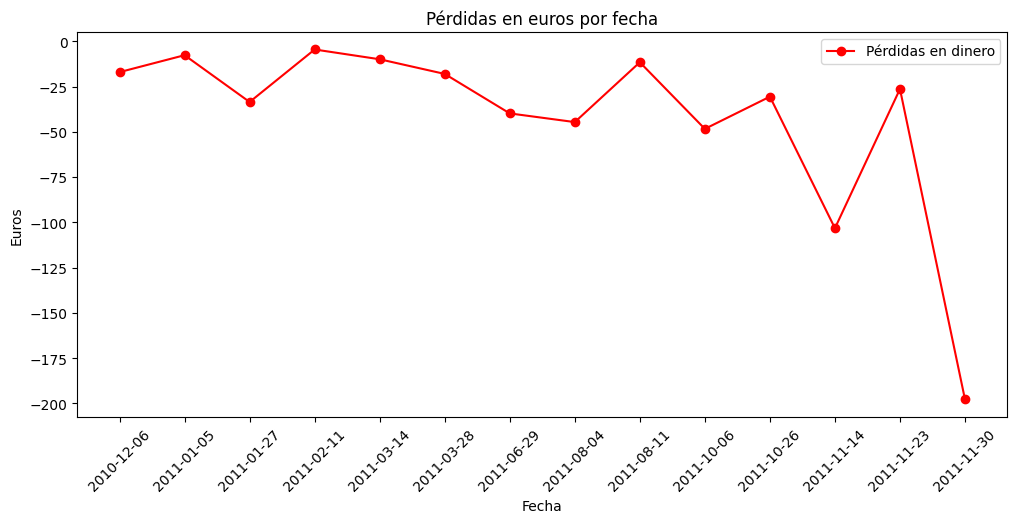

In [35]:
plt.figure(figsize=(12,5))
plt.plot(data_saldo_negativo,marker ='o', label='Pérdidas en dinero', color = 'red')
plt.xticks(rotation= 45)
plt.legend()
plt.title('Pérdidas en euros por fecha')
plt.xlabel('Fecha')
plt.ylabel('Euros')
plt.show()

Con esta gráfica podemos identificar que los días con una mayor perdida vendría siendo:

* 30/Noviembre/2011 (-197.80 euros)
* 14/Noviembre/2011 (-103.20)



Ya teniendo esta información en mente podríamos entrar a investigar si hubo algún factor externo que está relacionado con estos resultados o simplemente entraríamos a investigar por qué hay una pérdida tan significativa en ese día

Cabe recalcar que al ser un inventario, cuando nos referimos a pérdidas hablamos de productos perdidos y su valor total monetario

Ahora vamos a analizar lo que vendrían siendo los días que se generaron ganancias

In [36]:
dias_ganancias = retail_italia[retail_italia['Total']>0]
dias_ganancias

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Total
404195,571670,200,2011-10-18,0.72,12611.0,144.00
492344,578108,144,2011-11-23,0.39,14912.0,56.16
492341,578108,100,2011-11-23,0.72,14912.0,72.00
163480,550606,96,2011-04-19,0.39,12594.0,37.44
492343,578108,96,2011-11-23,0.39,14912.0,37.44
...,...,...,...,...,...,...
485524,577609,1,2011-11-21,39.95,12349.0,39.95
313225,564476,1,2011-08-25,10.40,12610.0,10.40
313226,564476,1,2011-08-25,9.95,12610.0,9.95
313228,564476,1,2011-08-25,12.75,12610.0,12.75


Vamos a ver el total de ganancias el cuál corresponde a: 17483.24 euros

In [37]:
dias_ganancias['Total'].sum()

17483.239999999998

Vamos a realizar una gráfica donde veamos los días en los cuáles se registró una mayor ganancia

In [38]:
saldo_positivo = dias_ganancias.groupby('InvoiceDate').sum()
saldo_positivo = saldo_positivo.drop(columns=['InvoiceNo'])
saldo_positivo

,Quantity,UnitPrice,CustomerID,Total
InvoiceDate,,,,
2010-12-03,164,98.50,305400.0,427.80
2010-12-21,131,108.50,200240.0,383.70
2011-01-13,748,200.60,880460.0,1608.66
2011-01-21,145,52.70,151128.0,341.00
2011-01-26,228,98.30,327366.0,452.85
2011-02-18,111,53.50,163722.0,256.00
2011-03-04,84,141.19,226512.0,463.63
2011-03-17,440,168.14,638214.0,1017.68
2011-03-28,164,70.35,176316.0,325.50


In [39]:
#saldo_positivo = saldo_positivo['Total']
saldo_positivo = saldo_positivo.sort_values(by = 'Total', ascending= False)
saldo_positivo

,Quantity,UnitPrice,CustomerID,Total
InvoiceDate,,,,
2011-11-21,631,605.10,901477.0,1757.55
2011-01-13,748,200.60,880460.0,1608.66
2011-11-18,544,232.32,692230.0,1363.16
2011-10-18,846,173.88,819715.0,1193.32
2011-03-17,440,168.14,638214.0,1017.68
2011-08-05,457,263.58,680940.0,946.75
2011-10-24,289,62.65,302256.0,722.40
2011-08-10,521,39.17,277068.0,721.95
2011-11-22,142,128.55,302038.0,611.19


In [40]:
saldo_positivo = saldo_positivo.sort_values(by='InvoiceDate', ascending= True)
saldo_positivo

,Quantity,UnitPrice,CustomerID,Total
InvoiceDate,,,,
2010-12-03,164,98.50,305400.0,427.80
2010-12-21,131,108.50,200240.0,383.70
2011-01-13,748,200.60,880460.0,1608.66
2011-01-21,145,52.70,151128.0,341.00
2011-01-26,228,98.30,327366.0,452.85
2011-02-18,111,53.50,163722.0,256.00
2011-03-04,84,141.19,226512.0,463.63
2011-03-17,440,168.14,638214.0,1017.68
2011-03-28,164,70.35,176316.0,325.50


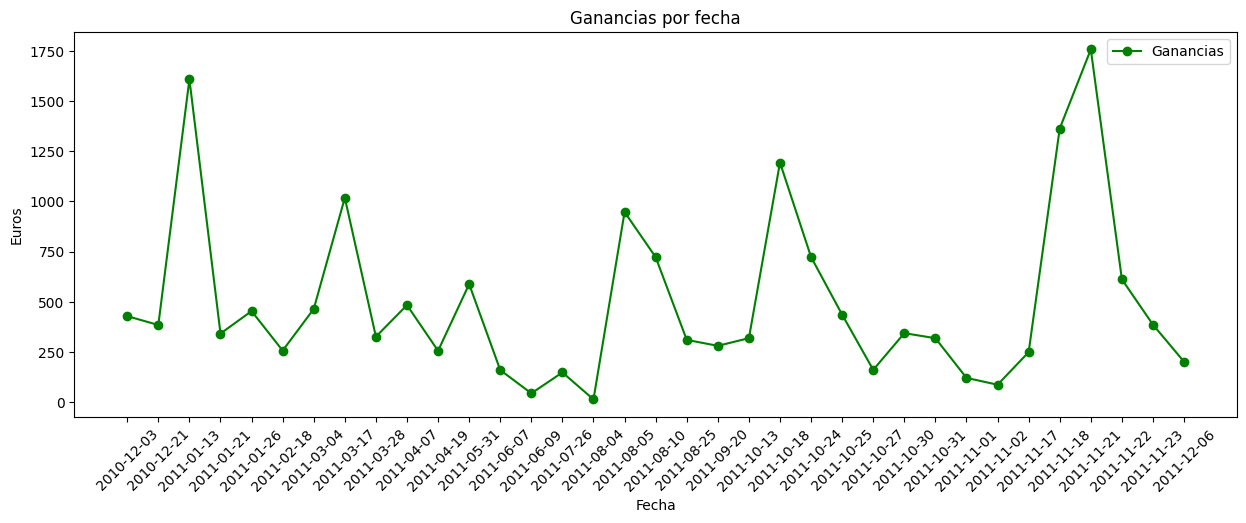

In [41]:
plt.figure(figsize=(15,5))
plt.plot(saldo_positivo['Total'],marker ='o', label='Ganancias', color= 'green')
plt.title('Ganancias por fecha')
plt.xlabel('Fecha')
plt.ylabel('Euros')
plt.xticks(rotation= 45)
plt.legend()
plt.show()

Estos son los días que se registraron ganancias, pero para poder ver con más claridad, vamos a hacer una gráfica sólo con los días donde la ganancia sea de 900 euros o más



In [42]:
ganancias_superiores = saldo_positivo[saldo_positivo['Total']>=900]
ganancias_superiores

,Quantity,UnitPrice,CustomerID,Total
InvoiceDate,,,,
2011-01-13,748,200.60,880460.0,1608.66
2011-03-17,440,168.14,638214.0,1017.68
2011-08-05,457,263.58,680940.0,946.75
2011-10-18,846,173.88,819715.0,1193.32
2011-11-18,544,232.32,692230.0,1363.16
2011-11-21,631,605.10,901477.0,1757.55


In [43]:
#ganancias_superiores = ganancias_superiores['Total']
ganancias_superiores

,Quantity,UnitPrice,CustomerID,Total
InvoiceDate,,,,
2011-01-13,748,200.60,880460.0,1608.66
2011-03-17,440,168.14,638214.0,1017.68
2011-08-05,457,263.58,680940.0,946.75
2011-10-18,846,173.88,819715.0,1193.32
2011-11-18,544,232.32,692230.0,1363.16
2011-11-21,631,605.10,901477.0,1757.55


In [44]:
ganancias_superiores = ganancias_superiores.sort_values(by='InvoiceDate', ascending= False)
ganancias_superiores

,Quantity,UnitPrice,CustomerID,Total
InvoiceDate,,,,
2011-11-21,631,605.10,901477.0,1757.55
2011-11-18,544,232.32,692230.0,1363.16
2011-10-18,846,173.88,819715.0,1193.32
2011-08-05,457,263.58,680940.0,946.75
2011-03-17,440,168.14,638214.0,1017.68
2011-01-13,748,200.60,880460.0,1608.66


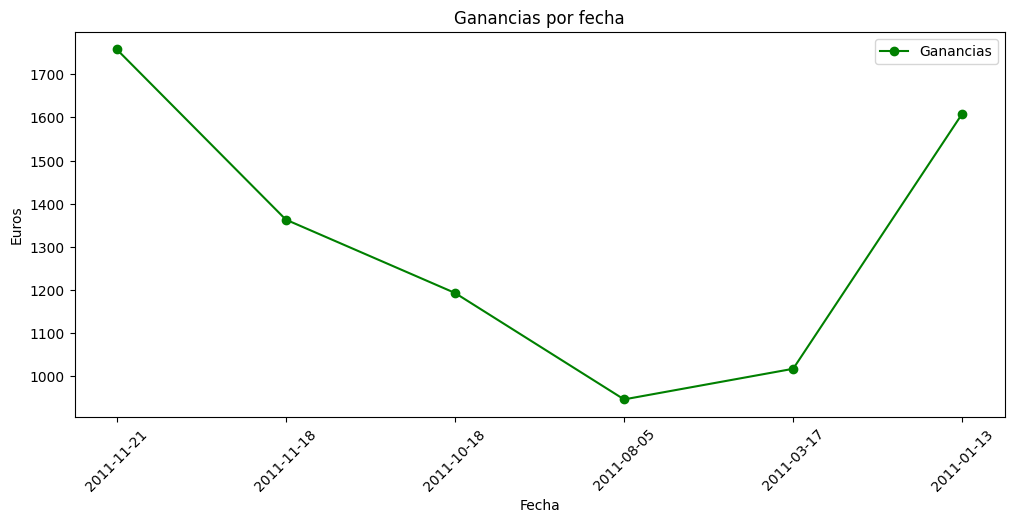

In [45]:
plt.figure(figsize=(12,5))
plt.plot(ganancias_superiores['Total'],marker ='o', label='Ganancias', color= 'green')
plt.title('Ganancias por fecha')
plt.xlabel('Fecha')
plt.ylabel('Euros')
plt.legend()
plt.xticks(rotation= 45)
plt.show()

Acá podemos identificar que los días con mayor ingreso fueron:

1.   21/Noviembre/2011 (1757.55 euros)
2.   13/Enero/2011 (1608.66 euros)



In [46]:
retail_italia.head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Total
404195,571670,200,2011-10-18,0.72,12611.0,144.00
492344,578108,144,2011-11-23,0.39,14912.0,56.16
492341,578108,100,2011-11-23,0.72,14912.0,72.00
163480,550606,96,2011-04-19,0.39,12594.0,37.44
492343,578108,96,2011-11-23,0.39,14912.0,37.44


In [47]:
productos = retail_italia.sort_values(by= ['UnitPrice'], ascending= False)
productos

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Total
485574,577609,1,2011-11-21,300.00,12349.0,300.00
313233,564476,1,2011-08-25,40.00,12610.0,40.00
479766,577178,1,2011-11-18,40.00,12618.0,40.00
421317,572934,4,2011-10-27,40.00,12610.0,160.00
431869,573768,3,2011-11-01,40.00,12552.0,120.00
...,...,...,...,...,...,...
404192,571670,24,2011-10-18,0.39,12611.0,9.36
296581,562922,24,2011-08-10,0.29,12594.0,6.96
296584,562922,72,2011-08-10,0.29,12594.0,20.88
296580,562922,24,2011-08-10,0.29,12594.0,6.96


In [48]:
productos['UnitPrice']

,UnitPrice
485574,300.00
313233,40.00
479766,40.00
421317,40.00
431869,40.00
...,...
404192,0.39
296581,0.29
296584,0.29
296580,0.29


Con esto podemos observar que lo que más ganancias genera son los costos de envío, los cuales se encuentran en la tabla como POSTAGE

Ahora vamos a agrupar los datos por facturas para saber cuál fue la compra más grande realizada

In [49]:
numero_facturas = retail_italia.groupby('InvoiceNo').sum()
numero_facturas = numero_facturas.drop(columns= ['InvoiceDate'])
numero_facturas

,Quantity,UnitPrice,CustomerID,Total
InvoiceNo,,,,
537022,164,98.50,305400.0,427.80
539752,131,108.50,200240.0,383.70
541115,748,200.60,880460.0,1608.66
541703,145,52.70,151128.0,341.00
542238,228,98.30,327366.0,452.85
544399,111,53.50,163722.0,256.00
545664,84,141.19,226512.0,463.63
546875,440,168.14,638214.0,1017.68
547914,163,42.35,163722.0,297.50


In [50]:
retail_italia.info()

<class 'pandas.core.frame.DataFrame'>
Index: 803 entries, 404195 to 298044
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    803 non-null    object 
 1   Quantity     803 non-null    int64  
 2   InvoiceDate  803 non-null    object 
 3   UnitPrice    803 non-null    float64
 4   CustomerID   803 non-null    float64
 5   Total        803 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 76.2+ KB


Los facturas con la C al principio indican devoluciones o reembolsos según lo que hemos visto

In [51]:
numero_facturas = numero_facturas.sort_values(by='Total', ascending= False)
numero_facturas

,Quantity,UnitPrice,CustomerID,Total
InvoiceNo,,,,
577609,631,605.10,901477.0,1757.55
541115,748,200.60,880460.0,1608.66
571670,846,173.88,819715.0,1193.32
577316,448,159.30,553432.0,1185.85
546875,440,168.14,638214.0,1017.68
562528,457,263.58,680940.0,946.75
572457,289,62.65,302256.0,722.40
562922,521,39.17,277068.0,721.95
555107,267,60.25,289662.0,587.45


In [52]:
numero_facturas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55 entries, 577609 to C579785
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Quantity    55 non-null     int64  
 1   UnitPrice   55 non-null     float64
 2   CustomerID  55 non-null     float64
 3   Total       55 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 2.1+ KB


In [53]:
ventas = numero_facturas[[ 'Quantity','Total']]
ventas

,Quantity,Total
InvoiceNo,,
577609,631,1757.55
541115,748,1608.66
571670,846,1193.32
577316,448,1185.85
546875,440,1017.68
562528,457,946.75
572457,289,722.40
562922,521,721.95
555107,267,587.45


Acá podemos ver las 5 primeros compras más grandes realizadas en Italia

In [54]:
numero_facturas.head()

,Quantity,UnitPrice,CustomerID,Total
InvoiceNo,,,,
577609,631,605.10,901477.0,1757.55
541115,748,200.60,880460.0,1608.66
571670,846,173.88,819715.0,1193.32
577316,448,159.30,553432.0,1185.85
546875,440,168.14,638214.0,1017.68


Ahora vamos a ver los clientes que realizan más compras

In [55]:
clientes = retail_italia.groupby('CustomerID').sum()
clientes = clientes.sort_values(by='Total', ascending= False)
clientes

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,Total
CustomerID,,,,,
12594.0,5506065629225740225629225629225629225629225479...,1776,2011-04-192011-08-102011-11-022011-08-102011-0...,374.73,3320.22
12578.0,5773165411155411155411155411155411155411155773...,1171,2011-11-182011-01-132011-01-132011-01-132011-0...,373.00,2753.36
12610.0,5625285625285625285625285625285644765644765769...,1028,2011-08-052011-08-052011-08-052011-08-052011-0...,545.77,2057.99
12584.0,5807465558435709195778095733655733655733655456...,354,2011-12-062011-06-072011-10-132011-11-222011-1...,938.10,1893.95
12349.0,5776095776095776095776095776095776095776095776...,631,2011-11-212011-11-212011-11-212011-11-212011-1...,605.10,1757.55
12611.0,5716705716705716705716705716705716705716705716...,846,2011-10-182011-10-182011-10-182011-10-182011-1...,173.88,1193.32
12514.0,5468755468755468755468755468755468755468755468...,440,2011-03-172011-03-172011-03-172011-03-172011-0...,168.14,1017.68
14912.0,5781085781085781085492335492335492335781085492...,970,2011-11-232011-11-232011-11-232011-04-072011-0...,80.94,841.52
12591.0,5422385422385422385422385422385422385422385422...,228,2011-01-262011-01-262011-01-262011-01-262011-0...,98.30,452.85


In [56]:
clientes_mayoristas = clientes['Total']
clientes_mayoristas

,Total
CustomerID,
12594.0,3320.22
12578.0,2753.36
12610.0,2057.99
12584.0,1893.95
12349.0,1757.55
12611.0,1193.32
12514.0,1017.68
14912.0,841.52
12591.0,452.85
